In [1]:
from neural.network import (
    Symbol, Input, Container, Network    
)
from neural.model.neuron import HodgkinHuxley
from neural.model.synapse import AMPA
from neural.basemodel import Model
from neural.utils import generate_stimulus
from neural.backend import NumbaCPUBackendMixin
import numpy as np
from IPython.display import Image
from neural.utils.network import to_graph
import matplotlib.pyplot as plt

In [2]:
num = 10
dt = 1e-4
dur = .5
waveform = generate_stimulus('step', dt, dur, (.1, dur+dt), np.linspace(0, 100, num))
t = np.arange(waveform.shape[-1])*dt

In [13]:
nn = Network()
inp = nn.input(name='Input', num=num)
hhn = nn.add(HodgkinHuxley, name='neuron', num=num)
syn = nn.add(AMPA, name='synapse', num=num)
hhn(stimulus=inp)
syn(stimulus=hhn.v)
nn.compile()
inp(np.ascontiguousarray(waveform.T))
hhn.record('v')
syn.record('s', 'I')

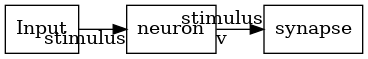

In [14]:
Image(to_graph(nn, png=True, size="11.,6.", spline="polyline"))

In [15]:
nn.run(dt, verbose=True)

  0%|                                                                                                         …

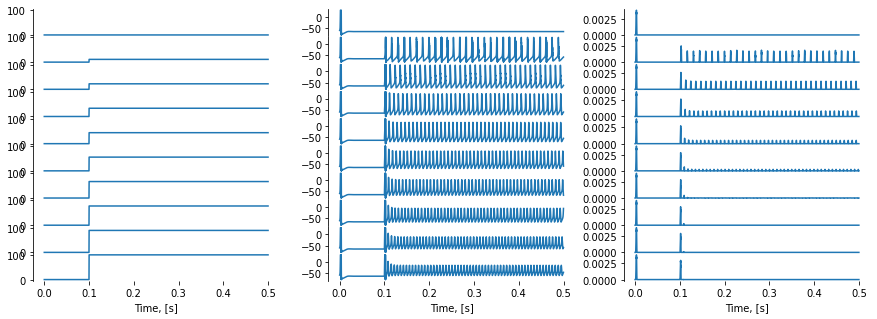

In [19]:
fig,axes = plt.subplots(num,3,figsize=(15,5),gridspec_kw=dict(hspace=0.), sharex=True, sharey='col')
ax_inp = axes[:,0]
ax_neu = axes[:,1]
ax_syn = axes[:,2]
for n, (i,v,s) in enumerate(zip(waveform, hhn.recorder.v, syn.recorder.s)):
    ax_inp[n].plot(t, i)
    ax_neu[n].plot(t, v)
    ax_syn[n].plot(t, s)

_ = [[ax.spines[d].set_visible(False) for ax in axes.ravel()] for d in ['bottom', 'right','top']]
_ = [ax.set_xlabel('Time, [s]') for ax in axes[-1]]